<h1 align=center><font size = 6>Building Neural Networks with Two Neurons and Hidden Layers From Scratch</font></h1>

<h1 align=center><font size = 4>Sigmoid Function</font></h1>

<img src="https://i.giphy.com/media/9N2UvCx7wXLnG/giphy.webp" height=400 width=1000 alt="https://giphy.com/harvard/">

<small>Picture Source:<a href="https://giphy.com/harvard/">https://giphy.com/harvard/</a></small>

<br>

<h2>Introduction</h2>
<p>In this lab, we will build a neural network from scratch and code how it performs predictions using forward propagation. After doing forward propagation, we are going to use backpropagation. We are going to use sigmoid function for our model. The sigmoid function, also known as the sigmoidal curve, is one of the most common activation functions. sigmoid; It is a mathematical operation that compresses the input data between <i>0</i> and <i>1</i>. It is applied in neural networks to normalize the output signal of a neuron. It has a shape similar to an S shape.</p>

<br>

<p>It’s easy to work with and has all the nice properties of activation functions: it’s non-linear, continuously differentiable, monotonic, and has a fixed output range. Please note that all deep learning libraries have the entire training and prediction processes implemented.
</p>

<br>

<h2>Objective:</h2>
<ol>
  <li>Build <i>Artifical Neural Networks (ANNs)</i> from scratch.</li>
  <li>Calculate network output using forward propagation.</li>
  <li>Calculate <i>loss</i> between <i>ground truth</i> and estimated output.</li>
  <li>Update <i>weights</i> and <i>biases</i> throught <i>backpropagation</i>.</li>
  <li>Repeate the above three steps until number of iterations is reached or error between <i>ground truth</i> (<i>T</i>) and <i>predicted output</i> (<i>a<sub>2</sub></i>) is below a predefined threshold.</li>
</ol>

<br>

<h2>Keywords</h2>
<ul>
  <li>Computer Science</li>
  <li>Classification</li>
  <li>Sigmoid Function</li>
  <li>Neural Networks</li>
  <li>Scratch</li>
</ul>
<br>

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#import">Import Libraries</a></li>
<li><a href="https://#build_neural_network">Building Simple Neural Network</a></li>
<li><a href="https://#build_func">Building Function for Artificial Neural Network with Sigmoid Function</a></li>
<li><a href="https://#build_func_with_grph">Building Function for Artificial Neural Network with Sigmoid Function and Loss Graph</a></li>
<br>

<p></p>
Estimated Time Needed: <strong>15 min</strong>
</div>

<br>
<h2 align=center id="import">Import Libraries</h2>
<p>The following are the libraries we are going to use for this lab:</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import seaborn as sns

In [2]:
!unzip -q images.zip

<br>
<h2 align=center id="build_neural_network">Building Simple Neural Network</h2>
<p>The following are the libraries we are going to use for this lab:</p>

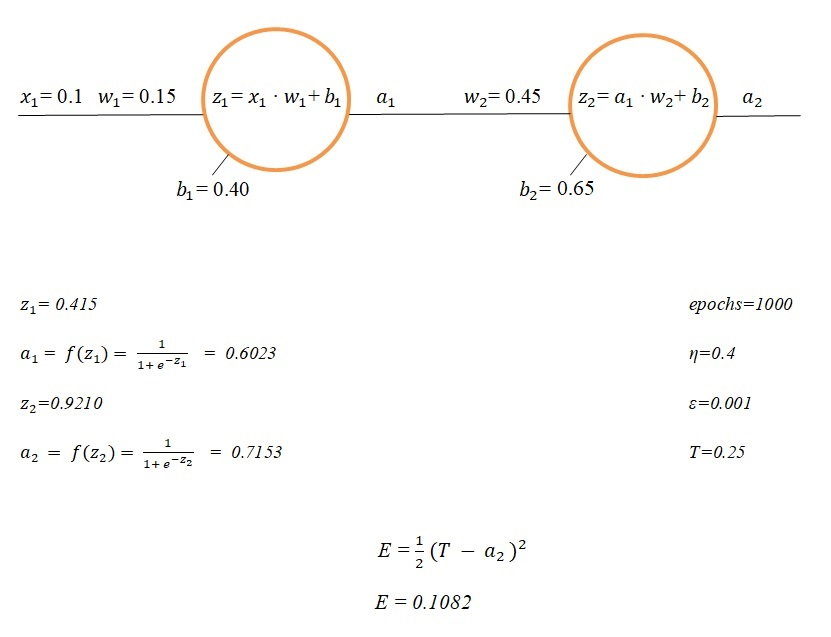

In [3]:
Image(filename='image_folder/back_prop.jpg', width=1000)

<br>
<h3>Creating parameters</h3>

In [4]:
weights = [0.15, 0.45]
biases = [0.40, 0.65] 
T = 0.25 #@param {type:"number"}
lr = 0.4 #@param {type:"number"}
threshold = 0.001 #@param {type:"number"}
epochs = 300 #@param {type:"number"}

Let's print the weights and biases

In [5]:
print(weights)
print(biases)

[0.15, 0.45]
[0.4, 0.65]


<br>
<h3>Weights</h3>

In [6]:
print(f'\nw\u2081: {weights[0]}') #  weight 1
print(f'w\u2082: {weights[1]}') #  weight 2


w₁: 0.15
w₂: 0.45


<br>
<h3>Biases</h3>

In [7]:
print(f'\nb\u2081: {biases[0]}') #  bias 1
print(f'b\u2082: {biases[1]}') #  bias 2


b₁: 0.4
b₂: 0.65


Now that we have the weights and the biases defined for the network, let's compute the output for a given input x<sub>1</sub>.

In [8]:
x_1 = 0.1
print(f"Input of our network: {x_1}")

Input of our network: 0.1


<br>
<h3>Building Sigmoid Function for the Neural Network</h3>

<h4>Sigmoid function:</h4>

$$\sigma(x) = \frac{1} {1 + e^{-x}}$$

<h4>Derivative of the sigmoid function:</h4>


$$\sigma'(x) = \sigma(x) \cdot (1-\sigma(x))$$

In [9]:
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    ds = s * (1 - s)  
    return s, ds

<br>
<h3>Calculate a<sub>2</sub> and Error</h3>

Let's start by computing the wighted sum of the input, z<sub>1</sub> at the first node of the hidden layer.

In [10]:
z_1 = x_1 * weights[0] + biases[0]

print('The weighted sum of the input at the first node in the first hidden layer is {}'.format(z_1))

The weighted sum of the input at the first node in the first hidden layer is 0.41500000000000004


Using a sigmoid function as the activation function, the output of the network would be 0.6023.

In [11]:
a_1 = sigmoid(z_1)[0]
a_1

0.6022861768886306

Let's start computing the wighted sum of the input, z<sub>2</sub> at the first node of second hidden layer.

In [12]:
z_2 = a_1 * weights[1] + biases[1]

print('The weighted sum of the input at the first node in second hidden layer is {}'.format(z_2))

The weighted sum of the input at the first node in second hidden layer is 0.9210287795998838


In [13]:
a_2 = sigmoid(z_2)[0]
print(f'Model predicted or estimated as {a_2}')

Model predicted or estimated as 0.7152516802527555


Let's calculate error between predicted output (a<sub>2</sub>) and the ground truth (T)

In [14]:
E = 1 / 2 * (T - a_2) ** 2
E

0.10822956298900614

<br>
<h3>Updating Weights and Biases</h3>

<br>
<h4>Updating w<sub>2</sub></h4>

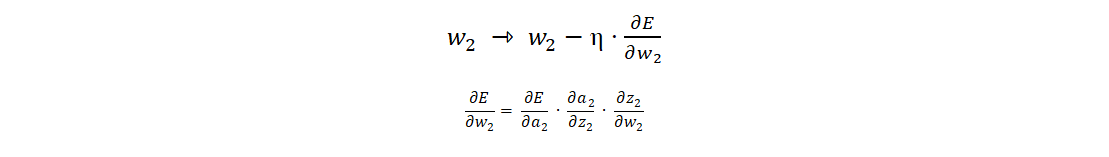

In [15]:
Image(filename='image_folder/update_w2.png', width=1000)

In [16]:
weights[1] = weights[1] - lr * (-(T - a_2)) * sigmoid(a_2)[1] * a_1

print(f'Updated w\u2082 value is {weights[1]}')

Updated w₂ value is 0.4252775600684266


<br>
<h4>Updating b<sub>2</sub></h4>

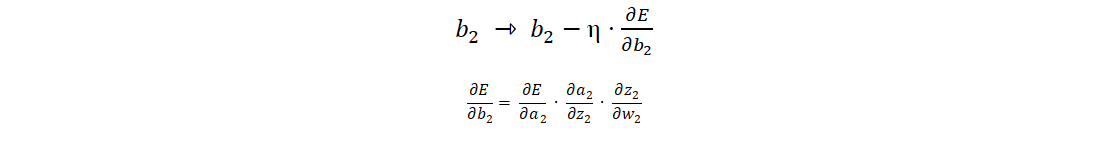

In [17]:
Image(filename='image_folder/update_b2.png', width=1000)

In [18]:
biases[1] = biases[1] - lr * (-(T - a_2)) * sigmoid(a_2)[1] * 1

print(f'Updated b\u2082 value is {biases[1]}')

Updated b₂ value is 0.6089523371442993


<br>
<h4>Updating w<sub>1</sub></h4>

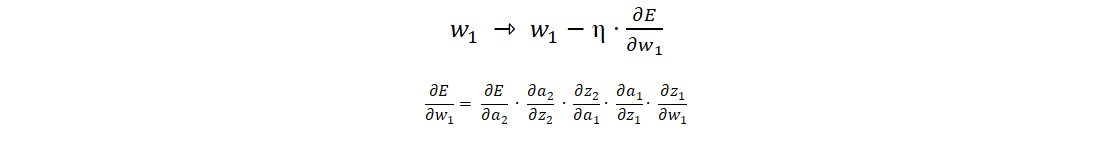

In [19]:
Image(filename='image_folder/update_w1.png', width=1000)

In [20]:
weights[0] = weights[0] - lr * (-(T - a_2)) * sigmoid(a_2)[1] * weights[1] * sigmoid(a_1)[1] * x_1

print(f'Updated w\u2081 value is {weights[0]}')

Updated w₁ value is 0.14960088573400288


<br>
<h4>Updating b<sub>1</sub></h4>

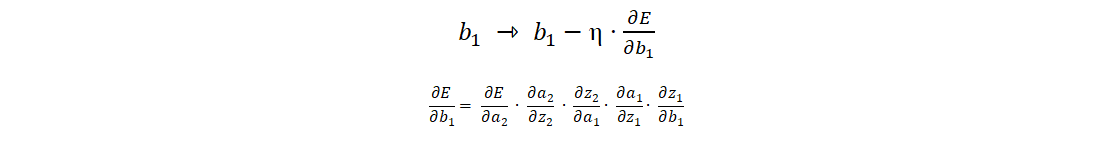

In [21]:
Image(filename='image_folder/update_b1.png', width=1000)

In [22]:
biases[0] = biases[0] - lr * (-(T - a_2)) * sigmoid(a_2)[1] * weights[1] * sigmoid(a_1)[1] * 1

print(f'Updated b\u2081 value is {biases[0]}')

Updated b₁ value is 0.3960088573400289


Let's print out our updated biases and weights:

In [23]:
print(weights)
print(biases)
print(f'\nw\u2081: {weights[0]}') #  weight 1
print(f'w\u2082: {weights[1]}') #  weight 2
print(f'\nb\u2081: {biases[0]}') #  bias 1
print(f'b\u2082: {biases[1]}') #  bias 2

[0.14960088573400288, 0.4252775600684266]
[0.3960088573400289, 0.6089523371442993]

w₁: 0.14960088573400288
w₂: 0.4252775600684266

b₁: 0.3960088573400289
b₂: 0.6089523371442993


<br>
<h2 align=center id="build_func">Building Function for Artificial Neural Network with Sigmoid Function</h2>

<p>At this stage, a function covering the processes and stages done so far has been created. You are completely free to make changes to the parameters.</p>


In [24]:
def forw_backProp(x_1, w_1, w_2, b_1, b_2, T, lr, treshold, epochs):
    
    i = 0
    while i < epochs:
        
        # Calculate z_1
        z_1 = x_1 * w_1 + b_1
        # Calculate a_1
        a_1 = 1.0 / (1.0 + np.exp(-z_1))
        # Calculate z_2
        z_2 = a_1 * w_2 + b_2
        # Calculate a_2
        a_2 = 1.0 / (1.0 + np.exp(-z_2))        
        # Calculate error between predicted value and the ground truth.
        E = 1 / 2 * (T - a_2) ** 2

        # Updating weights and biases
        w_2 = w_2 - lr * (-(T - a_2)) * sigmoid(a_2)[1] * a_1
        b_2 = b_2 - lr * (-(T - a_2)) * sigmoid(a_2)[1] * 1
        w_1 = w_1 - lr * (-(T - a_2)) * sigmoid(a_2)[1] * w_2 * sigmoid(a_1)[1] * x_1
        b_1 = b_1 - lr * (-(T - a_2)) * sigmoid(a_2)[1] * w_2 * sigmoid(a_1)[1] * 1        
        i+=1
        
        ## print(f'\nw\u2081: {w_1}') #  weight 1
        ## print(f'w\u2082: {w_2}') #  weight 2
        ## print(f'\nb\u2081: {b_1}') #  bias 1
        ## print(f'b\u2082: {b_2}') #  bias 2
        
        print(f'\nEpoch {i} - Loss {E} - Output {a_2}')
        
    

In [25]:
forw_backProp(0.1, 0.15, 0.45, 0.4, 0.65, T, lr, threshold, epochs)


Epoch 1 - Loss 0.10822956298900614 - Output 0.7152516802527555

Epoch 2 - Loss 0.10289352658176308 - Output 0.7036375790909811

Epoch 3 - Loss 0.09769380528668406 - Output 0.6920267079864837

Epoch 4 - Loss 0.09264210851569407 - Output 0.6804465321400419

Epoch 5 - Loss 0.08774841113506929 - Output 0.668923408596534

Epoch 6 - Loss 0.08302093412516884 - Output 0.6574823532993026

Epoch 7 - Loss 0.07846616147051715 - Output 0.6461468451736481

Epoch 8 - Loss 0.0740888895339867 - Output 0.6349386692292337

Epoch 9 - Loss 0.0698923043728766 - Output 0.6238777992148681

Epoch 10 - Loss 0.06587808196443447 - Output 0.6129823190306505

Epoch 11 - Loss 0.06204650611107128 - Output 0.6022683809571086

Epoch 12 - Loss 0.058396598860049144 - Output 0.591750197834761

Epoch 13 - Loss 0.05492625855486813 - Output 0.5814400656374185

Epoch 14 - Loss 0.05163240108503626 - Output 0.5713484124281191

Epoch 15 - Loss 0.04851110046478337 - Output 0.5614838694532459

Epoch 16 - Loss 0.04555772549966421 

<br>
<h2 align=center id="build_func_with_grph">Building Function for Artificial Neural Network with Sigmoid Function and Loss Graph</h2>

In [26]:
def prop_Visual(x_1, w_1, w_2, b_1, b_2, T, lr, treshold, epochs):

  def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    ds = s * (1 - s)  
    return s, ds
  
  epoch=[]
  error=[]
  
  i = 0
  while i < epochs:
      
      # Calculate z_1
      z_1 = x_1 * w_1 + b_1
      # Calculate a_1
      a_1 = 1.0 / (1.0 + np.exp(-z_1))
      # Calculate z_2
      z_2 = a_1 * w_2 + b_2
      # Calculate a_2
      a_2 = 1.0 / (1.0 + np.exp(-z_2))        
      # Calculate error between predicted value and the ground truth.
      E = 1 / 2 * (T - a_2) ** 2

      # Updating weights and biases
      w_2 = w_2 - lr * (-(T - a_2)) * sigmoid(a_2)[1] * a_1
      b_2 = b_2 - lr * (-(T - a_2)) * sigmoid(a_2)[1] * 1
      w_1 = w_1 - lr * (-(T - a_2)) * sigmoid(a_2)[1] * w_2 * sigmoid(a_1)[1] * x_1
      b_1 = b_1 - lr * (-(T - a_2)) * sigmoid(a_2)[1] * w_2 * sigmoid(a_1)[1] * 1     
      error.append(E)
      epoch.append(i)        
      i+=1
  
  
  plt.figure(figsize=(20, 10))
  sns.set_style('whitegrid')
  plt.title('Loss Graph')
  plt.plot(epoch, error)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

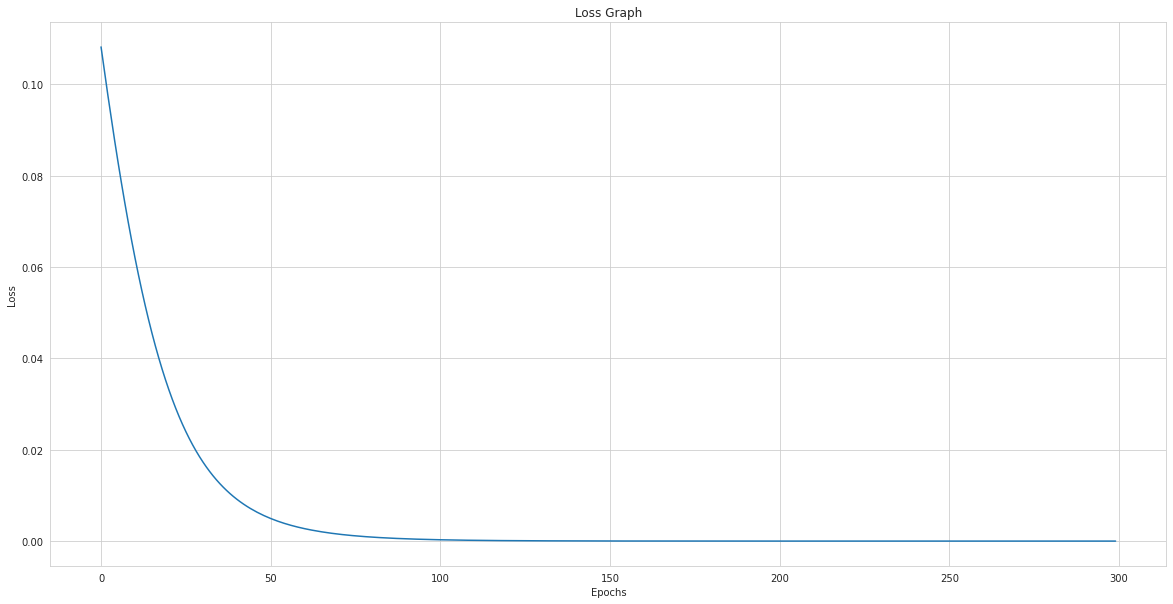

In [27]:
prop_Visual(0.1, 0.15, 0.45, 0.4, 0.65, T, lr, threshold, epochs)

<p>As we can see from the plot, our model working relatively great. 

Tips:</p>

<ol>
  <li>Small treshold : Slow convergence</li>
  <li>Large treshold : Our error may not decrease on every iteration; may not converge.</li>
  <li>Make sure that you are using treshold like <i>0.001</i>, <i>0.01</i>, <i>0.1</i> and etc.</li>
</ol>

<br>

<h1>Contact Me</h1>
<p>If you have something to say to me please contact me:</p>

<ul>
  <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
  <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [29]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2022-12-05 14:42:48
